In [11]:
import os
import scipy.io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [2]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

df = pd.read_csv('extracted_features.csv')
print(df.tail())

Saving extracted_features.csv to extracted_features.csv
      participant_id  epoch  timestep_start  timestep_end  channel_1_max  \
5995               5   1196    59397.574029  59450.425971      24.045951   
5996               5   1197    59443.574029  59496.425971       5.331387   
5997               5   1198    59480.574029  59533.425971       1.875617   
5998               5   1199    59531.574029  59584.425971       4.197667   
5999               5   1200    59571.574029  59624.425971      25.052931   

      channel_1_min  channel_1_mean  channel_1_amplitude_range  channel_2_max  \
5995      -6.272611        7.312801                  30.318562      21.552072   
5996      -4.369379       -0.173267                   9.700766       5.279641   
5997     -15.777908       -5.933162                  17.653525       4.799626   
5998     -10.762230       -2.152945                  14.959897      -0.679937   
5999      -7.086182        9.096240                  32.139113       7.991888   



In [20]:
pos = sum(df['trigger']==1)
neg = sum(df['trigger']==-1)
print("positives:", pos, "negatives", neg, pos/neg)

positives: 750 negatives 5250 0.14285714285714285


In [4]:
y_train = df[df['participant_id'] != 5]['trigger']
y_test = df[df['participant_id'] == 5]['trigger']
X_train = df[df['participant_id'] != 5].drop(columns=['participant_id', 'trigger'])
X_test = df[df['participant_id'] == 5].drop(columns=['participant_id', 'trigger'])

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (4800, 113)
X_test shape: (1200, 113)


In [14]:
# grid search hyperparameter tuning
X_train_sampled = X_train.sample(frac=0.25, random_state=100)
y_train_sampled = y_train.loc[X_train_sampled.index]

param_grid = {
    'n_estimators': [250, 500, 1000],
    'max_features': [2, 4, 6],
    'min_samples_leaf': [5, 10, 25, 50]
}

model = RandomForestClassifier(random_state=100, class_weight={-1: 1, 1: 10})

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2)
grid_result = grid_search.fit(X_train_sampled, y_train_sampled)

with open('RF_GS.pkl', 'wb') as file:
    pickle.dump(grid_search, file)

best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_features=2, min_samples_leaf=5, n_estimators=250; total time=   0.7s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=250; total time=   0.7s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=250; total time=   0.7s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=250; total time=   0.7s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=250; total time=   0.7s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500; total time=   1.4s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500; total time=   1.9s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500; total time=   1.9s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500; total time=   1.3s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=500; total time=   1.3s
[CV] END max_features=2, min_samples_leaf=5, n_estimators=1000; total time=   2.7s
[CV] END max_features=2, min_sample

RandomForestClassifier(class_weight={-1: 1, 1: 10}, max_features=4,
                       min_samples_leaf=5, n_estimators=250, random_state=100)
Test Accuracy: 0.8750
f1 score: 0.0132
Classification Report:
               precision    recall  f1-score   support

          -1       0.88      1.00      0.93      1050
           1       0.50      0.01      0.01       150

    accuracy                           0.88      1200
   macro avg       0.69      0.50      0.47      1200
weighted avg       0.83      0.88      0.82      1200

Confusion Matrix:
 [[1049    1]
 [ 149    1]]


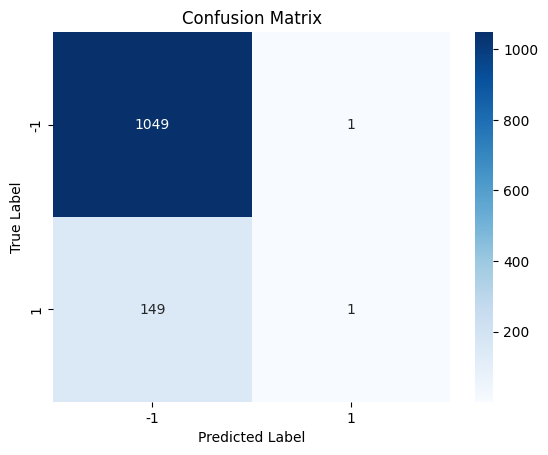

In [26]:
print(best_rf)
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"f1 score: {f1:.4f}")
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[-1, 1], yticklabels=[-1, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [22]:
# grid search hyperparameter tuning
X_train_sampled = X_train.sample(frac=0.25, random_state=100)
y_train_sampled = y_train.loc[X_train_sampled.index]

param_grid = {
    'n_estimators': [250, 500],
    'max_features': [3, 4, 5],
    'min_samples_leaf': [1, 3, 5, 10, 25]
}

model = RandomForestClassifier(random_state=100, class_weight={-1: 1, 1: 100})

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2)
grid_result = grid_search.fit(X_train_sampled, y_train_sampled)

with open('RF_GS.pkl', 'wb') as file:
    pickle.dump(grid_search, file)

best_RF = grid_search.best_estimator_

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END max_features=3, min_samples_leaf=1, n_estimators=250; total time=   1.8s
[CV] END max_features=3, min_samples_leaf=1, n_estimators=250; total time=   2.6s
[CV] END max_features=3, min_samples_leaf=1, n_estimators=250; total time=   2.0s
[CV] END max_features=3, min_samples_leaf=1, n_estimators=250; total time=   1.8s
[CV] END max_features=3, min_samples_leaf=1, n_estimators=250; total time=   2.9s
[CV] END max_features=3, min_samples_leaf=1, n_estimators=500; total time=   5.0s
[CV] END max_features=3, min_samples_leaf=1, n_estimators=500; total time=   4.3s
[CV] END max_features=3, min_samples_leaf=1, n_estimators=500; total time=   3.4s
[CV] END max_features=3, min_samples_leaf=1, n_estimators=500; total time=   3.5s
[CV] END max_features=3, min_samples_leaf=1, n_estimators=500; total time=   4.3s
[CV] END max_features=3, min_samples_leaf=1, n_estimators=1000; total time=   7.0s
[CV] END max_features=3, min_sample

RandomForestClassifier(class_weight={-1: 1, 1: 100}, max_features=3,
                       n_estimators=250, random_state=100)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Accuracy: 0.8750
f1 score: 0.0000
Classification Report:
               precision    recall  f1-score   support

          -1       0.88      1.00      0.93      1050
           1       0.00      0.00      0.00       150

    accuracy                           0.88      1200
   macro avg       0.44      0.50      0.47      1200
weighted avg       0.77      0.88      0.82      1200

Confusion Matrix:
 [[1050    0]
 [ 150    0]]


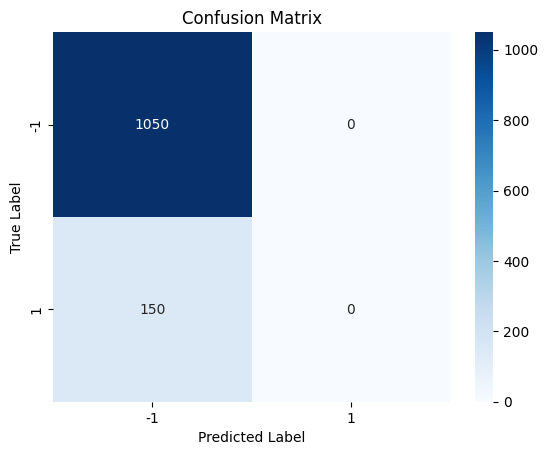

In [25]:
# RF training
print(best_RF)
best_RF.fit(X_train, y_train)
y_pred = best_RF.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"f1 score: {f1:.4f}")
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[-1, 1], yticklabels=[-1, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()